<a href="https://colab.research.google.com/github/R786P/data-science-roadmap-2025_2026/blob/main/18_projects/01_end_to_end_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pygit2==1.15.1
%cd /content
!git clone https://github.com/lllyasviel/Fooocus.git
%cd /content/Fooocus
!python entry_with_update.py --share --always-high-vram

🎯 End-to-End Customer Churn Prediction Project

📊 Churn Rate: 0.2653698707936959


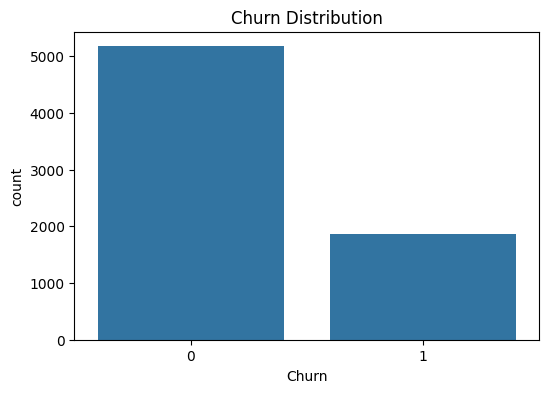


✅ Model Performance:
              precision    recall  f1-score   support

           0       0.82      0.89      0.85      1036
           1       0.60      0.45      0.51       373

    accuracy                           0.77      1409
   macro avg       0.71      0.67      0.68      1409
weighted avg       0.76      0.77      0.76      1409



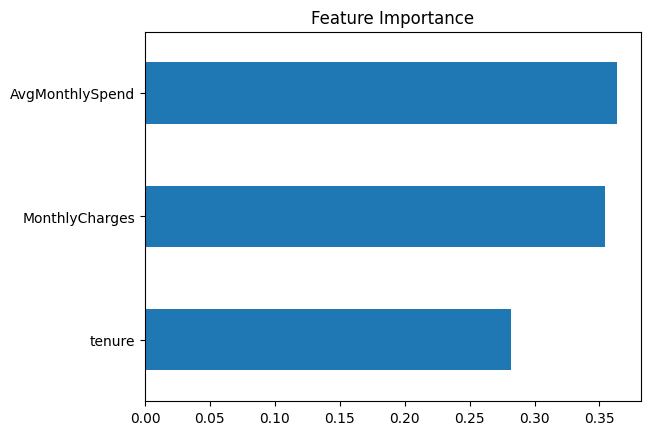


💡 Business Insight:
- Tenure is the most important factor
- Longer customers are less likely to churn


In [2]:

# 18_projects/01_end_to_end_churn.ipynb
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

print("🎯 End-to-End Customer Churn Prediction Project\n")

# 1. Load Data
df = pd.read_csv("https://raw.githubusercontent.com/IBM/telco-customer-churn-on-icp4d/master/data/Telco-Customer-Churn.csv")
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'] = df['TotalCharges'].fillna(0)
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# 2. EDA
print("📊 Churn Rate:", df['Churn'].mean())
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Churn')
plt.title('Churn Distribution')
plt.show()

# 3. Feature Engineering
df['AvgMonthlySpend'] = df['TotalCharges'] / (df['tenure'] + 1)
df['AvgMonthlySpend'] = df['AvgMonthlySpend'].fillna(df['MonthlyCharges'])

# 4. Model Training
X = df[['tenure', 'MonthlyCharges', 'AvgMonthlySpend']]
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 5. Evaluation
y_pred = model.predict(X_test)
print("\n✅ Model Performance:")
print(classification_report(y_test, y_pred))

# 6. Feature Importance
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.sort_values().plot(kind='barh')
plt.title('Feature Importance')
plt.show()

print("\n💡 Business Insight:")
print("- Tenure is the most important factor")
print("- Longer customers are less likely to churn")